In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("DRUGS_SIDE_EFFECTS_DATASET.csv")

In [3]:
df.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [4]:
df.shape

(400000, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


In [6]:
df.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [7]:
df.describe()

,AGE
count,399980.000000
mean,41.466513
std,12.550773
min,14.000000
25%,31.000000
50%,41.000000
75%,51.000000
max,600.000000


In [8]:
df.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

In [9]:
df.nunique()

NAME            133911
GENDER               2
DRUG NAME          502
AGE                 80
RACE                 9
SIDE EFFECTS         5
dtype: int64

# EDA

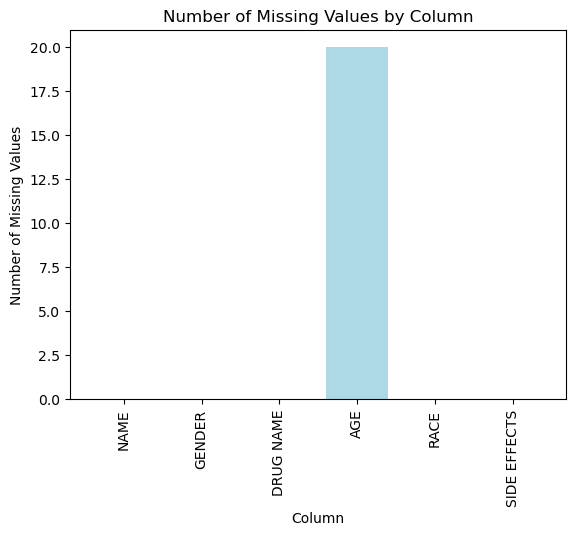

In [10]:
null_counts = df.isna().sum()
plt.bar(null_counts.index, null_counts.values,color="lightblue")
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')
plt.title('Number of Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

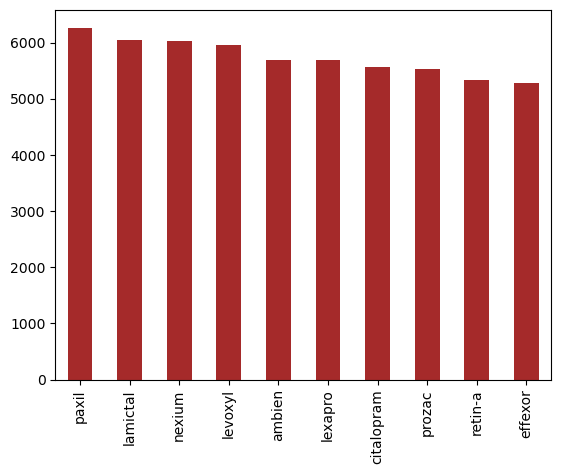

In [11]:
df["DRUG NAME"].value_counts().head(10).plot(kind="bar",color='brown')
plt.show()

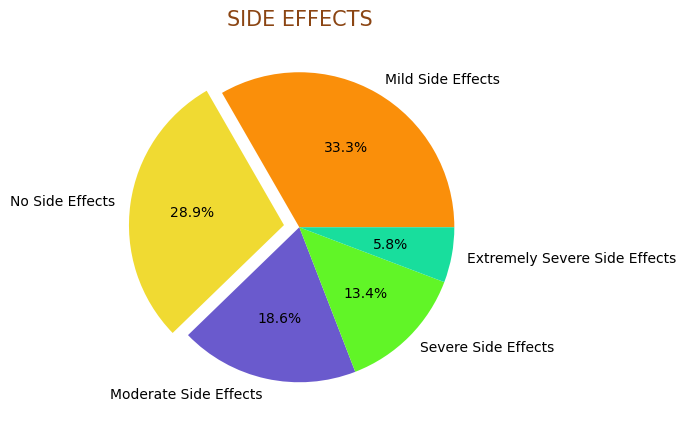

In [13]:
label=df["SIDE EFFECTS"].value_counts().index
count=df["SIDE EFFECTS"].value_counts().values
color = ['#FA8F0A','#F0DA32','slateblue','#61F527','#18DE9D']
explode = (0, 0.1, 0, 0, 0)
plt.figure(1, figsize=(5,10))
plt.pie(count, labels=label, colors=color, autopct='%1.1f%%', explode=explode)
plt.title("SIDE EFFECTS",color="saddlebrown",fontsize=15)
plt.show()

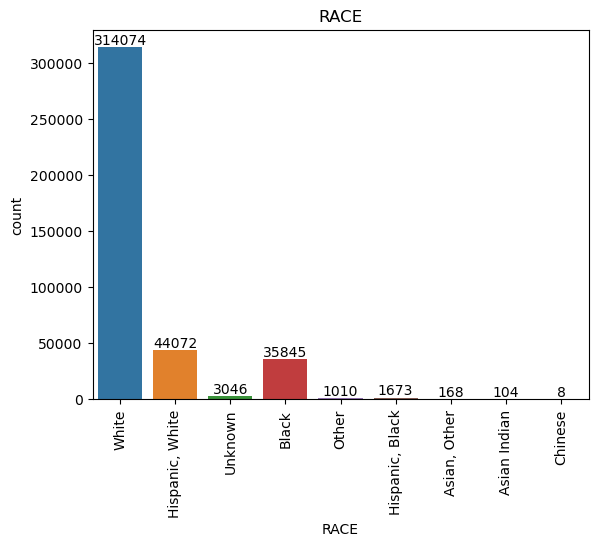

In [14]:
ax = sns.countplot(data = df,x='RACE')
plt.title('RACE')
x = ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

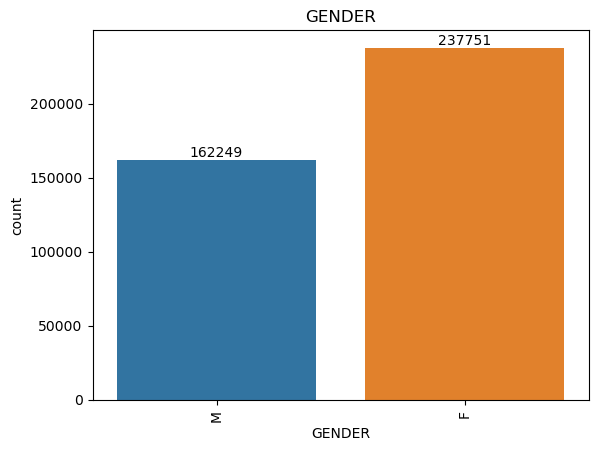

In [15]:
ax = sns.countplot(data = df,x='GENDER')
plt.title('GENDER')
x = ax.bar_label(ax.containers[0])
plt.xticks(rotation=90)

plt.show()

Text(0, 0.5, 'Range')

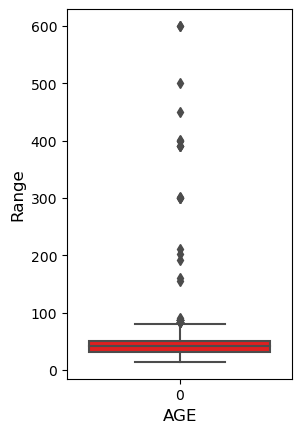

In [16]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'], color = 'red')
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

In [17]:
#BIVARIATE ANALYSIS

<Figure size 1200x1000 with 0 Axes>

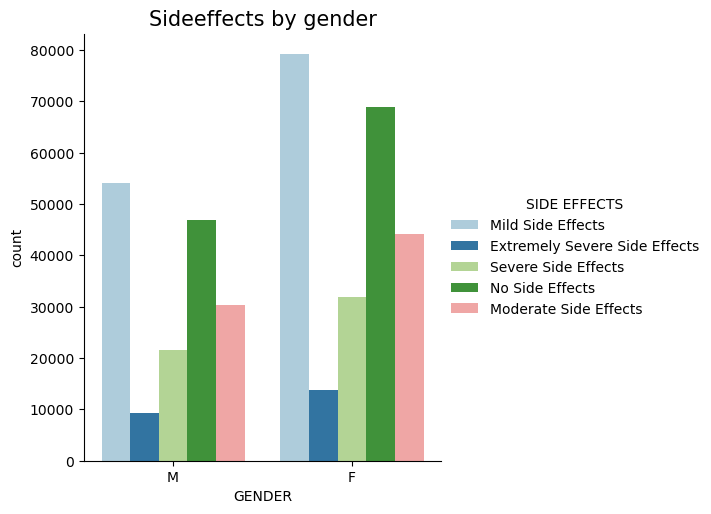

In [18]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='GENDER', hue='SIDE EFFECTS', kind='count', data=df, palette='Paired')
plt.title('Sideeffects by gender', fontsize = 15)
plt.show()

<Figure size 1200x1000 with 0 Axes>

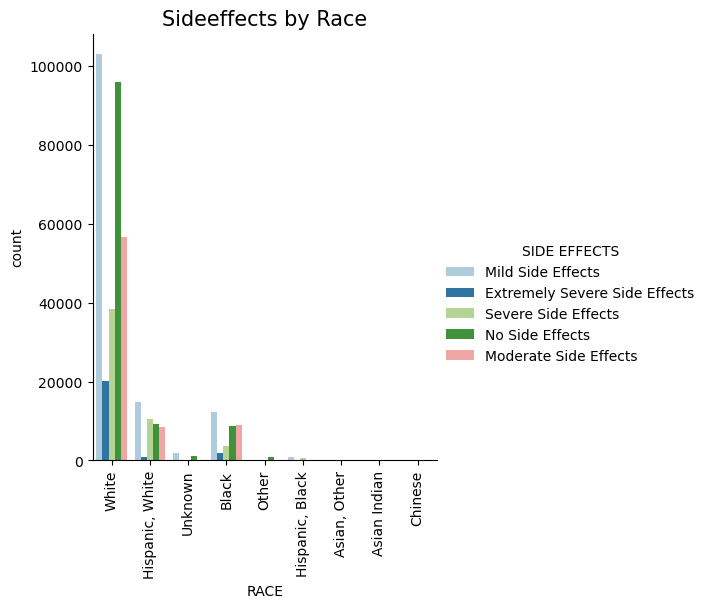

In [19]:
plt.figure(figsize=(12, 10))
sns.catplot(x ='RACE', hue='SIDE EFFECTS', kind='count', data=df, palette='Paired')
plt.title('Sideeffects by Race', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

In [20]:
#REMOVING OUTLIERS

In [21]:
for i in ['AGE']:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR=Q3-Q1
    upper_limit=Q3+1.5*IQR
    lower_limit=Q1-1.5*IQR
    df[i].where(df[i] > lower_limit, lower_limit, inplace = True)
    df[i].where(df[i] < upper_limit, upper_limit, inplace = True)

Text(0, 0.5, 'Range')

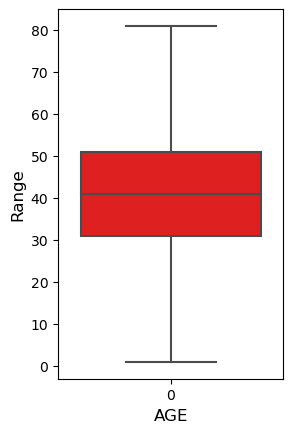

In [22]:
plt.subplot(1, 2, 1)
sns.boxplot(df['AGE'], color = 'red')
plt.xlabel('AGE', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

In [23]:
#TREATING NULLVALUES

In [24]:
df['AGE'].fillna(df['AGE'].median(), inplace = True)
df.isnull().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

In [25]:
#ENCODING

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import HashingVectorizer



In [27]:
df = df.drop('NAME', axis=1)

In [28]:
#Encode Categorical Variables
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['RACE'] = label_encoder.fit_transform(df['RACE'])
df['SIDE EFFECTS'] = label_encoder.fit_transform(df['SIDE EFFECTS'])
df['DRUG NAME'] = label_encoder.fit_transform(df['DRUG NAME'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   GENDER        400000 non-null  int32  
 1   DRUG NAME     400000 non-null  int32  
 2   AGE           400000 non-null  float64
 3   RACE          400000 non-null  int32  
 4   SIDE EFFECTS  400000 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 9.2 MB


array([[<Axes: title={'center': 'AGE'}>]], dtype=object)

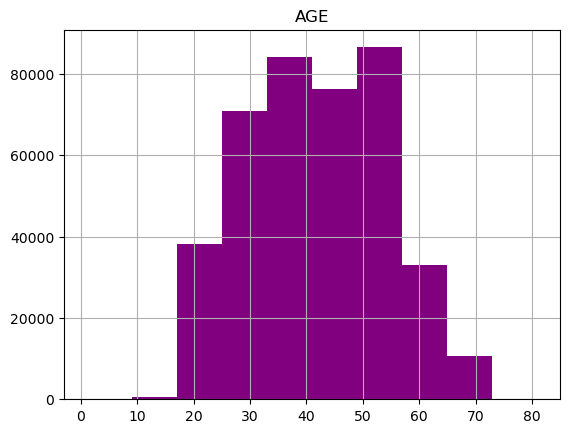

In [50]:
df.hist(column='AGE',color='purple')

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(df, columns=df.columns).corr(), annot=True, center=True)

In [ ]:
X = df.drop(['SIDE EFFECTS'], axis=1)
y = df['SIDE EFFECTS']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold, cross_val_score

In [ ]:
value= [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(),GradientBoostingClassifier(),SVC(),DecisionTreeClassifier(), AdaBoostClassifier()]

key= ['Logistic Regression', 'Random Forset Classifier',   'KNeighbors Classifier','Gradient Boosting Classifier','Support Vector Machines','Decision Tree','AdaBoost Classifier']

models= dict(zip(key,value))
accuracy_scores=[]
for key,value in models.items():
    value.fit(X_train,y_train)
    y_pred= value.predict(X_test)
    accuracy= accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(key)
    print(accuracy*100)
    conf = confusion_matrix(y_test, y_pred)
    print(conf)
    ConfusionMatrixDisplay(confusion_matrix=conf).plot()
    plt.title(key)
    plt.show()